In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


veri = pd.read_csv("Country-data.csv")
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
veri.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [5]:
veri.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
veri_kullanilacak = veri.iloc[:,1:]
veri_kullanilacak.columns.values

array(['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype=object)

In [7]:
std = StandardScaler()
veri_olceklenmis = pd.DataFrame(std.fit_transform(veri_kullanilacak), columns=veri_kullanilacak.columns)
veri_olceklenmis.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [8]:
gmm_model = GaussianMixture(n_components=2, n_init=15, covariance_type='full')
gmm_model.fit(veri_olceklenmis)

GaussianMixture(n_components=2, n_init=15)

In [9]:
veri['kume'] = gmm_model.predict(veri_olceklenmis)
veri.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kume
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [11]:
veri[['country','kume']].groupby('kume').count()

,country
kume,
0,106
1,61


In [2]:
#bic_degeri = gmm_model.bic(veri_olceklenmis)

print(f"İkili kümeleme işlemi için BIC değeri : {bic_degeri}")

İkili kümeleme işlemi için BIC değeri : 2510.3637222146635


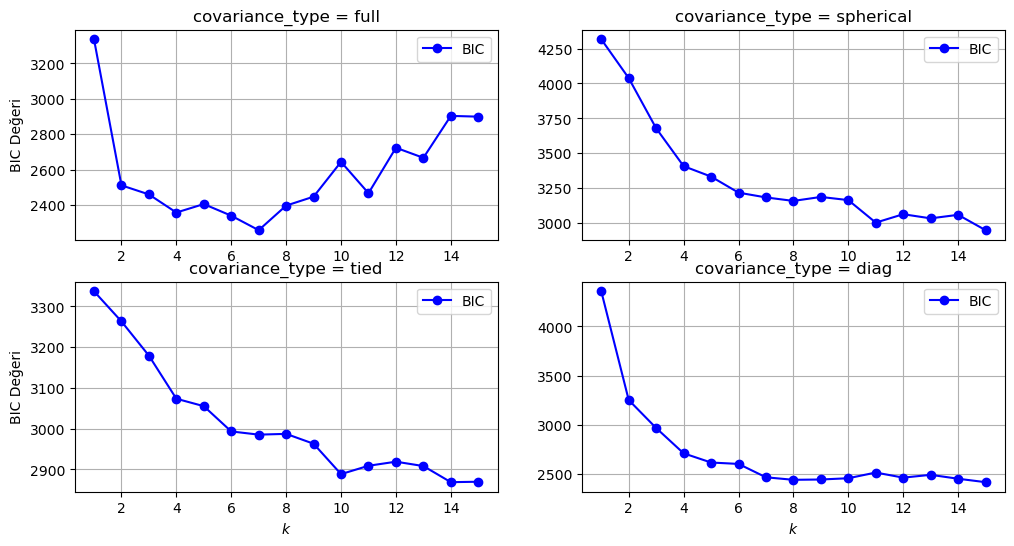

In [13]:
fig = plt.figure(figsize=(12,6))
min_bic = np.infty
en_iyi_k = 0
en_iyi_cov = ""
en_iyi_model=""

for i,cov in enumerate(['full','spherical', 'tied', 'diag']):
    bic_degerleri = []
    for k in range(1,16):    
        gmm_model = GaussianMixture(n_components=k,n_init=15, covariance_type=cov)
        gmm_model.fit(veri_olceklenmis)
        bic_degeri = gmm_model.bic(veri_olceklenmis)
        bic_degerleri.append(bic_degeri)
        
        if bic_degeri < min_bic:
            min_bic = bic_degeri
            en_iyi_k = k
            en_iyi_cov = cov
            en_iyi_model = gmm_model
        
    plt.subplot(2,2,i+1)
    plt.plot(range(1,16), bic_degerleri, "bo-", label="BIC")
    
    plt.title("covariance_type = {}".format(cov))
    plt.xlabel('$k$') if i in(2,3) else plt.xlabel('')
    plt.ylabel('BIC Değeri') if i in(0,2) else plt.ylabel('')
    plt.grid()
    plt.legend()

In [14]:
print(f"En iyi k değeri : {en_iyi_k}")
print(f"En iyi kovaryans matris değeri : {en_iyi_cov}")
print(f"En iyi BIC değeri : {min_bic}")

En iyi k değeri : 7
En iyi kovaryans matris değeri : full
En iyi BIC değeri : 2256.5812381193246


In [16]:
veri['kume'] = en_iyi_model.predict(veri_olceklenmis)
veri[['country','kume']].groupby('kume').count()

,country
kume,
0,40
1,57
2,3
3,34
4,24
5,3
6,6


In [17]:
veri.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kume
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


<AxesSubplot:xlabel='exports', ylabel='health'>

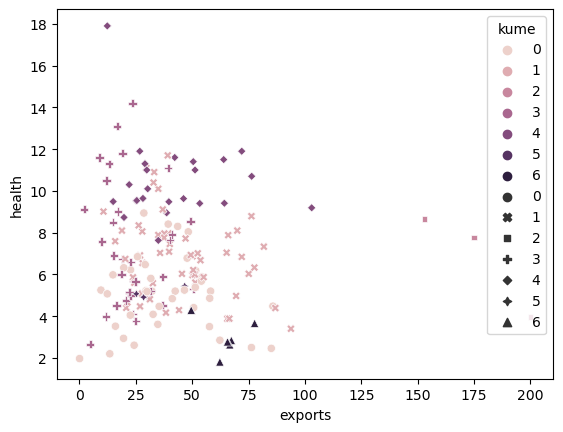

In [18]:
sns.scatterplot(data=veri, x="exports", y="health", hue="kume", style="kume")

In [19]:
veri.iloc[:,1:].groupby('kume').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
kume,,,,,,,,,
0,49.472500,38.499725,5.054250,43.899147,7191.750000,10.300525,67.195000,3.361250,3299.550000
1,13.750877,44.170175,6.782632,48.994737,16035.263158,5.762105,74.956140,1.899825,9243.859649
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,96.308824,23.191471,7.188824,45.814706,1650.676471,7.432500,58.047059,5.217941,860.352941
4,4.250000,41.712500,10.467500,39.275000,39783.333333,1.238167,80.833333,1.800833,44500.000000
5,57.733333,33.500000,5.140000,30.566667,9786.666667,63.033333,67.366667,3.650000,6160.000000
6,11.050000,64.900000,3.000000,36.666667,71516.666667,13.363333,77.083333,2.308333,36283.333333


In [20]:
veri[veri['kume'] == 5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kume
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650,5
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,5
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500,5
